# 7. Regresión lineal

Usaremos la función afín:

$$
\hat{y} = \mathbf{x}^{T}\boldsymbol{\beta} + v
$$

Esta función es llamada un **modelo de regresión**. En este caso las entradas de $\mathbf{x}$ son llamadas *regresores* y a $\hat{y}$ se le llama *predicción*. Hay que notar que la regresión es un modelo, nos estamos aproximando a estimar nuestra variable dependiente $y$, algunas veces llamada también *label*, *etiqueta* o *resultado esperado*. 

Al vector $\mathbf{\beta}$ se le denomina el *vector de pesos* mientras que el escalar $v$ es llamado el offset o bias. En conjunto $v$ y $\beta$ son los parámetros de la regresión. Recordamos que la notación $\hat{y}$ es usando para enfatizar que es un estimado o prediccción del resultado esperado $y$. 

## 7.1 Notación simplificada de un modelo de regresión. 

La concatenación de vectores nos puede ayudar a expresar de manera más sencilla la ecuación de regresión. Notemos que podemos definir el $(n+1)$-vector $\boldsymbol{\tilde{\beta}}^{T} = [v\; \boldsymbol{\beta}]$ y de igual forma el $(n+1)$-vector $\mathbf{\widetilde{x}}^{T} = [1 \; \boldsymbol{x}]$ de manera que:

$$
\hat{y} = \mathbf{x}^{T}\boldsymbol{\beta} + v = \begin{bmatrix}1\\ \mathbf{x}\end{bmatrix}^{T} \begin{bmatrix} v\\\boldsymbol{\beta}  \end{bmatrix} = \mathbf{\widetilde{x}}^{T} \boldsymbol{\widetilde{\beta}}
$$

Por simplicidad algunas veces solamente se escribe $\hat{y}=\mathbf{x}^{T}\boldsymbol{\beta}$ sobreentendiendo nuestra construcción. 

## 7.2 Un ejemplo de regresión. 

Vamos a considerar el siguiente ejemplo donde vamos a analizar una base de datos del *GOLDEN OAK RESEARCH GROUP*. Nuestra variable dependiente serán el ingreso promedio por casa y nuestros regresores serán simplemente la latitud y la longitud. 

Para poder cargar la base vamos a importar en conjunto a numpy también **pandas** la cual es una biblioteca de manejo y manipulación de bases de datos tomando como bases sus objetos *dataframe*. 

In [3]:
import matplotlib.pyplot as plt # Para poder realizar visualizaciones
import pandas as pd # Para poder acceder a pandas
import numpy as np # Para poder tener vectores

In [5]:
df = pd.read_csv('income_db_GORG.csv')

In [6]:
df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [9]:
len(df)

32526

In [10]:
df.columns

Index(['id', 'State_Code', 'State_Name', 'State_ab', 'County', 'City', 'Place',
       'Type', 'Primary', 'Zip_Code', 'Area_Code', 'ALand', 'AWater', 'Lat',
       'Lon', 'Mean', 'Median', 'Stdev', 'sum_w'],
      dtype='object')

¿Qué data contiene la base de datos?

¿Qué tamaño tiene?

In [11]:
len(df)*len(df.columns)

617994

In [11]:
len(df)

32526

Ahora bien, como comenté nuestros regresores en términos de columnas son:
* Lat
* Lon

Mientras que nuestra variable dependiente es:
* Mean 

Ahora, calcular el vector predicciones $\hat{y}$ ya que cada valor de Lat y Lon tendrá asociado un valor de Mean y es justo el que queremos aproximar con $\hat{y}$. Ahora, como no forma parte de este curso ya tenemos unos parámetros dados:

$$
v = 30980.48, \qquad \boldsymbol{\beta} = \begin{bmatrix}744.83 \\ -83.45\end{bmatrix}
$$

Con lo cual ya podemos realizar las predicciones $\hat{y}_{i} = \mathbf{x}^{T}_{i} \boldsymbol{\beta} + v$

In [12]:
def pred(x):
    beta = np.array([744.83,-83.45])
    v = 30980.48
    return x@beta + v

In [17]:
type(df['Lat'])

pandas.core.series.Series

In [18]:
type(df['Lat'].values)

numpy.ndarray

In [33]:
type( df[['Lat', 'Lon']] )

pandas.core.frame.DataFrame

In [30]:
X = df[['Lat','Lon']].values

In [34]:
type(X)

numpy.ndarray

In [36]:
X

array([[ 30.77145  , -88.079697 ],
       [ 31.708516 , -85.611039 ],
       [ 33.191452 , -86.615618 ],
       ...,
       [ 18.3565654, -67.180686 ],
       [ 18.4120413, -67.2134127],
       [ 18.4780938, -67.1604529]])

In [37]:
Y_hat = pred(X)

In [38]:
Y_hat

array([61250.22981815, 61742.17517683, 62930.54251526, ...,
       50259.22885358, 50303.28001129, 50348.05839956])

In [39]:
len(Y_hat)

32526

In [40]:
Y = df['Mean'].values

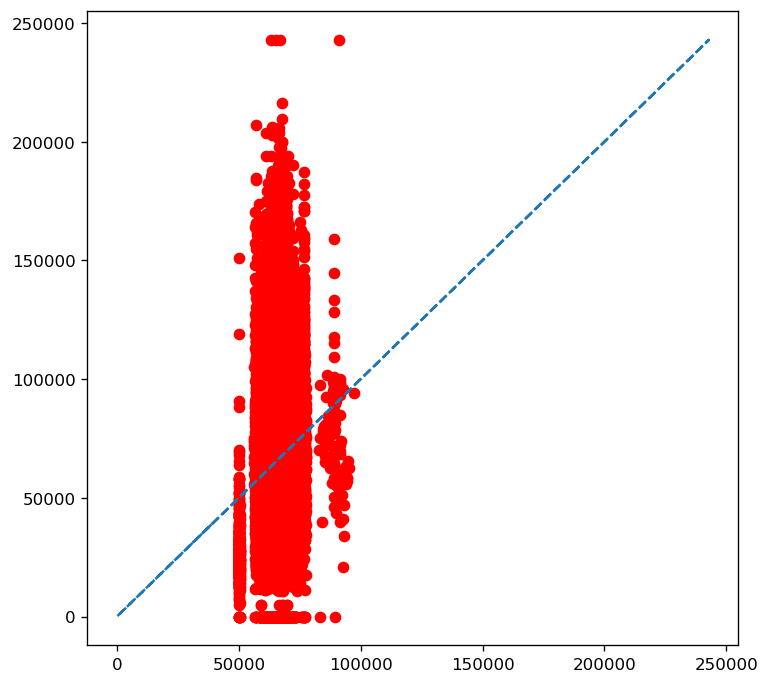

In [42]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)

ax.scatter(Y_hat,Y,marker ='o',color='red') # Plot the puntos
ax.plot(Y,Y,ls = '--') # Línea
plt.show()

¿Cómo calculamos el error?

## 7.3 Ejercicio. 

Considera que ya no solamente usamos Lat y Lon como regresores sino también comenzamos a usar Zip_Code como regresor, ajustar ese modelo nos deja con los siguientes parámetros:
$$
v = 4152.02, \qquad \boldsymbol{\beta} = \begin{bmatrix}6.55490348e+02 \\ 5.75918372e+02 \\ -2.94216316e-01\end{bmatrix}
$$

¿Mejora la preducción al introducir un nuevo regresor?